In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [9]:
# Generate a synthetic dataset with 300 samples and 2 features
data = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)
# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[0])

In [10]:
def initialize_medoids(data, k):
    medoids = data[np.random.choice(data.shape[0], k, replace=False)]
    return medoids

def compute_dissimilarities(data, medoids):
    dissimilarities = np.linalg.norm(data[:, np.newaxis] - medoids, axis=2)
    return dissimilarities

def assign_clusters(dissimilarities):
    clusters = np.argmin(dissimilarities, axis=1)
    return clusters

def update_medoids(data, clusters, k):
    medoids = np.array([np.mean(data[clusters == i], axis=0) for i in range(k)])
    return medoids

def k_means(data, k, max_iterations=100):
    medoids = initialize_medoids(data, k)

    for _ in range(max_iterations):
        dissimilarities = compute_dissimilarities(data, medoids)
        clusters = assign_clusters(dissimilarities)
        new_medoids = update_medoids(data, clusters, k)

        if np.array_equal(medoids, new_medoids):
            break

        medoids = new_medoids

    return medoids, clusters

In [30]:
k = 4
centroids, clusters = k_means(data_scaled, k)
wcss = np.sum([np.sum(np.square(data_scaled[clusters == i] -
centroids[i])) for i in range(k)])
print("Total within-cluster sum of squares:", wcss)

Total within-cluster sum of squares: 17.46619760906058


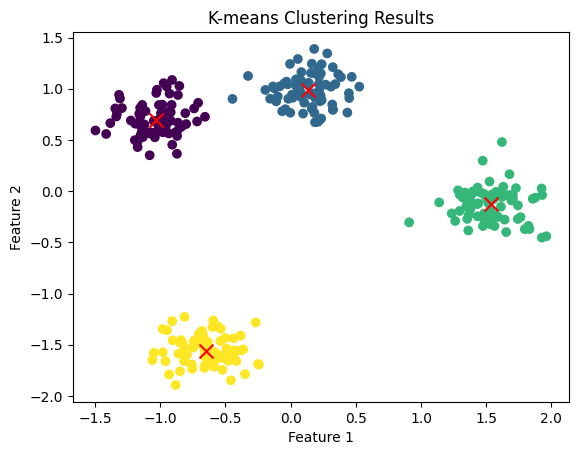

In [31]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results')
plt.show()

In [24]:
import numpy as np

def initialize_medoids(data, k):
    medoids = data[np.random.choice(data.shape[0], k, replace=False)]
    return medoids

def compute_dissimilarities(data, medoids):
    dissimilarities = np.linalg.norm(data[:, np.newaxis] - medoids, axis=2)
    return dissimilarities

In [34]:
def assign_clusters(dissimilarities):
    clusters = np.argmin(dissimilarities, axis=1)
    return clusters

def update_medoids(data, clusters, k):
    medoids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
    return medoids

def k_medoids(data, k, max_iterations=100):
    medoids = initialize_medoids(data, k)

    for _ in range(max_iterations):
        dissimilarities = compute_dissimilarities(data, medoids)
        clusters = assign_clusters(dissimilarities)
        new_medoids = update_medoids(data, clusters, k)

        if np.array_equal(medoids, new_medoids):
            break

        medoids = new_medoids

    return medoids, clusters

# Call the k_medoids function
data = np.random.rand(300, 2)  # Example random data
k = 4
max_iterations = 100
medoids, clusters = k_medoids(data, k, max_iterations)

# Print the medoids and clusters
print("Medoids:")
print(medoids)
print("Clusters:")
print(clusters)

Medoids:
[[0.28854212 0.22441307]
 [0.76577456 0.35423766]
 [0.62530796 0.77655441]
 [0.19337611 0.7396029 ]]
Clusters:
[0 3 1 1 3 0 2 2 3 1 3 0 1 2 0 0 2 3 3 2 2 3 1 0 3 3 1 2 1 2 3 3 2 2 1 0 2
 2 0 0 2 0 1 1 1 0 2 1 0 2 3 2 0 0 1 2 1 2 0 1 3 0 0 0 1 0 0 3 0 3 2 2 2 1
 3 0 1 1 2 2 0 3 1 0 3 1 2 2 1 1 2 0 0 3 2 2 2 0 0 1 2 0 2 1 2 1 0 2 2 2 0
 3 0 2 0 0 1 1 0 1 1 1 3 2 1 3 0 3 2 1 3 1 2 1 0 3 2 1 1 3 0 3 3 1 2 1 0 2
 2 3 3 0 2 3 0 2 3 3 0 2 1 2 1 3 1 0 3 1 2 0 2 2 1 2 3 2 0 1 2 1 3 0 0 0 2
 3 2 0 3 2 3 0 2 2 0 3 3 0 1 2 1 2 2 2 2 1 2 0 0 2 2 0 2 1 3 2 0 2 1 0 0 0
 0 1 3 0 2 2 2 2 1 0 0 3 0 1 3 0 3 3 3 0 0 0 2 2 2 1 3 3 3 0 1 2 3 1 0 1 3
 1 3 2 3 2 3 1 1 3 1 1 0 0 0 2 3 1 2 1 3 0 0 2 0 0 3 3 0 3 3 3 2 1 3 1 3 2
 2 2 3 1]
